# Mapping and Monitoring Floods

## Summary
Monitoring the spatial extent and evolution of floods is crucial for understanding the magnitude of the crisis and facilitate a proper response. This information will enable us to estimate affected population and infrastructure, critical infrastructure that might be at stake, road closures, etc. Satellite-based data serves as a powerful tool to detect flooded areas without being on-site and get an overall picture of the situation. NASA processes satellite data to provide a near-global open-source flood product that indicates at ~250 m resolution flooded areas.

This notebook aims to teach students how to obtain [MODIS Near Real-Time Global Flood Product](https://www.earthdata.nasa.gov/data/instruments/modis/near-real-time-data/modis-nrt-flood-product) from NASA and how to process it to visualize the extent of a flood. 

### Learning Objectives
#### Overall goals 
The main goal of this class is to teach students how to access and work with MODIS Near Real-Time Global Flood Product to monitor floods. 

#### Specific goals  
At the end of this notebook, you should have gained an understanding and appreciation of the following:
1. **MODIS Near Real-Time Global Flood Product**:
   - Understand how MODIS Near Real-Time Global Flood Product is generated.
   - Understand the different available variables and be able to select the necessary product for each particular case.
   - Understand how to download the data and its limitations.
2. **Learn how to visualize flood data**:
   - Plot a raster layer in Python.
   - Zoom into a region of interest from the raster layer.
   - Create an interactive map with the flood data.

## Introduction

The MODIS Near Real-Time Global Flood Product (Collection 61) (Release 1) (MCDWD) is processed by NASA's Land, Atmosphere Near real-time Capability for EO (LANCE). 

The Flood Product is a daily, near-global, ~250 m resolution product showing flood and surface water detected from the twice-daily overpass of the MODIS optical sensors (onboard Terra and Aqua satellites). To minimize false-positives from cloud and terrain shadows, they employ a multi-observation compositing approach, and generate the product over three compositing periods (1-day, 2-day, and 3-day).  The most optimal composite for a given flood event will depend on: the specific area of interest; cloud cover over dates of interest; potential spatial extent of likely flood water; and likely duration of flooding. Because the 1-day composite can often be contaminated with excess cloud-shadow false-positives, the 2 and 3-day composites are generally preferred, unless latency is critically important, and/or clouds are not a concern on the given date. 

Product generation consists of three key steps: 
1. Water detection algorithm applied to MODIS observations (Terra and Aqua). 

2. Compositing of water detections over 1, 2, and 3 days, to minimize false positives and fill in observations as clouds move. 

3. Differentiating flood from expected surface water (using a reference water mask).

The User Guide for this product can be found [here](https://www.earthdata.nasa.gov/s3fs-public/2024-04/MCDWD_UserGuide_RevD.pdf).

[Source](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/modis-nrt-global-flood-product?).

## Obtaining the data
The data can be quickly explored in [Worldview](https://go.nasa.gov/3OiKtYB). 

### Download the data
Data can be downloaded in two file formats, HDF or GeoTIFF. HDF file contains 15 raster layers that include the four flood layer and extra layers that allow users to create costume layers. In this class, we are concentrated in the four flood layers:
- 1-Day CS (cloud shadow)
- 1-Day
- 2-Day
- 3-Day

For convenience, GeoTIFF layers of the flood layers are offered.

**To download the data**:
1. Enter [here](https://nrt3.modaps.eosdis.nasa.gov/).
3. Go to NRT Data.
4. Login or Register for free.
5. Go to allData.
6. Go to 61, since this is the name of the Collection.
7. You can go to [MCDWD_L3_NRT](https://nrt3.modaps.eosdis.nasa.gov/archive/allData/61/MCDWD_L3_NRT) for downloading the HDF file or you can go to [MCDWD_L3_F1_NRT](https://nrt3.modaps.eosdis.nasa.gov/archive/allData/61/MCDWD_L3_F1_NRT), [MCDWD_L3_F2_NRT](https://nrt3.modaps.eosdis.nasa.gov/archive/allData/61/MCDWD_L3_F2_NRT), [MCDWD_L3_F3_NRT](https://nrt3.modaps.eosdis.nasa.gov/archive/allData/61/MCDWD_L3_F3_NRT) to download the GeoTIFF for 1, 2 or 3 day respectively.

**Which file should be downloaded?**

The product is distributed in 10x10° tiles, in a lat/lon (geographic) projection. The tiles are 4800 x 4800 pixels, with pixel size of 0.0020833 degrees (~232 m at the equator). An example product file name for the HDF is MCDWD_L3_NRT.A2021046.h30v12.061.hdf,
indicating date in YYYYDOY (YYYY=year; DOY=day-of-year) format, and tile h-v in MODIS linear latitude/longitude grid.

```{figure} ../images/modis_tile_map.png
---
width: 500
name: tile_map_modis
---
Modis Tiles map.
``` 

**What does the information mean?**

Each pixel in the raster layer can have the following values:
|Value|Description|
|--|--|
|0|No water|
|1|Surface water (matching expected water)|
|2|Recurring flood*|
|3|Flood (unusual)|
|255|Insufficient data|

*Value 2 (Recurring flood) is not yet populated as of Release 1.
[Source](https://www.earthdata.nasa.gov/s3fs-public/2024-04/MCDWD_UserGuide_RevD.pdf).

```{caution}
LANCE products are available in a rolling archive for one week after generation. For other standard
MODIS products, users wishing to access older products would obtain the standard (non-LANCE; science
quality) products from the appropriate NASA Distributed Active Archive Center (DAAC), which maintains
data indefinitely. However, the MODIS NRT Global Flood product is at present an applications product
only, without a corresponding standard product, and so no long-term DAAC archive is available. In
contrast, the legacy flood product was available via a PI-maintained (non-DAAC) archive, but this is no
longer available online. (For more information on Near Real-Time versus Standard Products see:
https://www.earthdata.nasa.gov/data/instruments/modis/near-real-time-data/modis-nrt-flood-product).
Please note the LANCE Flood product imagery accessible in Worldview through GIBS will remain
available; the rolling archive does not apply to GIBS imagery.
It is expected that a long-term archive will be established to address the needs of application users.
When this is available, the User Guide will be updated with details, and a notice sent to the mailing
list. In the meantime, the flood team has a limited ability to respond to requests for archive data; please
contact Earthdata support. [Source](https://www.earthdata.nasa.gov/s3fs-public/2024-11/MCDWD_UserGuide_RevD.1.pdf?VersionId=3y4YyPyJgZWGmXnvwVEI1rerec9vRmwH).
```

## Example - Flood in Rio Grande do Sul
The following example shows how to obtain, process and visualize the mentioned flood data. The complete process is demonstrated using the Rio Grande do Sul (Brazil) floods from the 6th of May of 2024 as an example. 

### Download the data
1. Search for the tile where the flood took place. In this case there were two tiles: h12v12 and h12v11.
2. Calculate how many days of the year there are till May the 6thth. In this case, 127 days.
3. Decide the flood layer to use, this example uses 2-day layer. In this case, we will use the 5th day of May because the 2-day layer is created using the current day information plus the day before. 
4. Assemble the file name: MCDWD_L3_F2_NRT.A2024127.h12v12.061.tiff.
5. Download the file.

### Preprocess the data
In this step we evaluate the data, check its bounds, CRS and concatenate it (if necessary).

In [1]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/home/sol/venv/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
h12v12 = rasterio.open('../../data/mapping-monitoring-floods/MCDWD_L3_F2_NRT.A2024127.h12v12.061.tif')
h12v11 = rasterio.open('../../data/mapping-monitoring-floods/MCDWD_L3_F2_NRT.A2024127.h12v11.061.tif')

In [3]:
# Check the raster width and height
h12v12.width, h12v12.height

(4800, 4800)

In [ ]:
# Check the data type
type(h12v12)

rasterio.io.DatasetReader

In [5]:
# Check the raster crs
h12v12.crs

CRS.from_wkt('GEOGCS["Unknown datum based upon the Clarke 1866 ellipsoid",DATUM["Not specified (based on Clarke 1866 spheroid)",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [6]:
h12v12.bounds # We can observe the 10 degrees tiles

BoundingBox(left=-60.0, bottom=-40.0, right=-50.0, top=-30.0)

In [7]:
h12v11.bounds # We can observe the 10 degrees tiles

BoundingBox(left=-60.0, bottom=-30.0, right=-50.0, top=-20.0)

In [8]:
# Read Band 1
data_h12v12 = h12v12.read(1)
data_h12v11 = h12v11.read(1)

We need to concatenate the arrays in order to get a single file and work with it.

In [9]:
new_data = np.concatenate((data_h12v11, data_h12v12))

### Plot flood maps
In this step we produced 3 maps:
- A general map with all the data from MODIS.
- A zoomed in map where we can observe the region from Porto Alegre.
- A dynamic map where we highlighted flooded pixels.

#### General map for the downloaded tiles

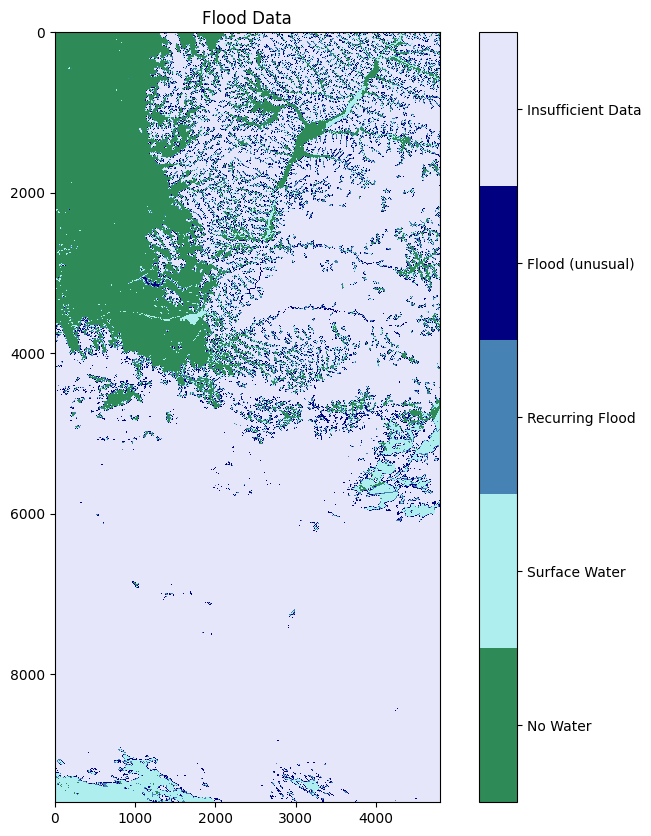

In [10]:
colors = ['seagreen', 'paleturquoise', 'steelblue', 'navy','lavender']
plot_data = new_data.copy()
plot_data[plot_data == 255] = 4 # Map 255 to 4 so it looks neat
cmap = ListedColormap(colors) # Create custom colormap

# Create the plot
plt.figure(figsize=(10, 10))
im = plt.imshow(plot_data, cmap=cmap, vmin=0, vmax=4)

# Create custom colorbar
cbar = plt.colorbar(im, ticks=[0.4, 1.2, 2, 2.8, 3.6])
cbar.ax.set_yticklabels(['No Water', 'Surface Water', 'Recurring Flood', 'Flood (unusual)', 'Insufficient Data'])  # Replace 4 with 255

plt.title('Flood Data')

plt.show()

#### Flood map of the area of Porto Alegre

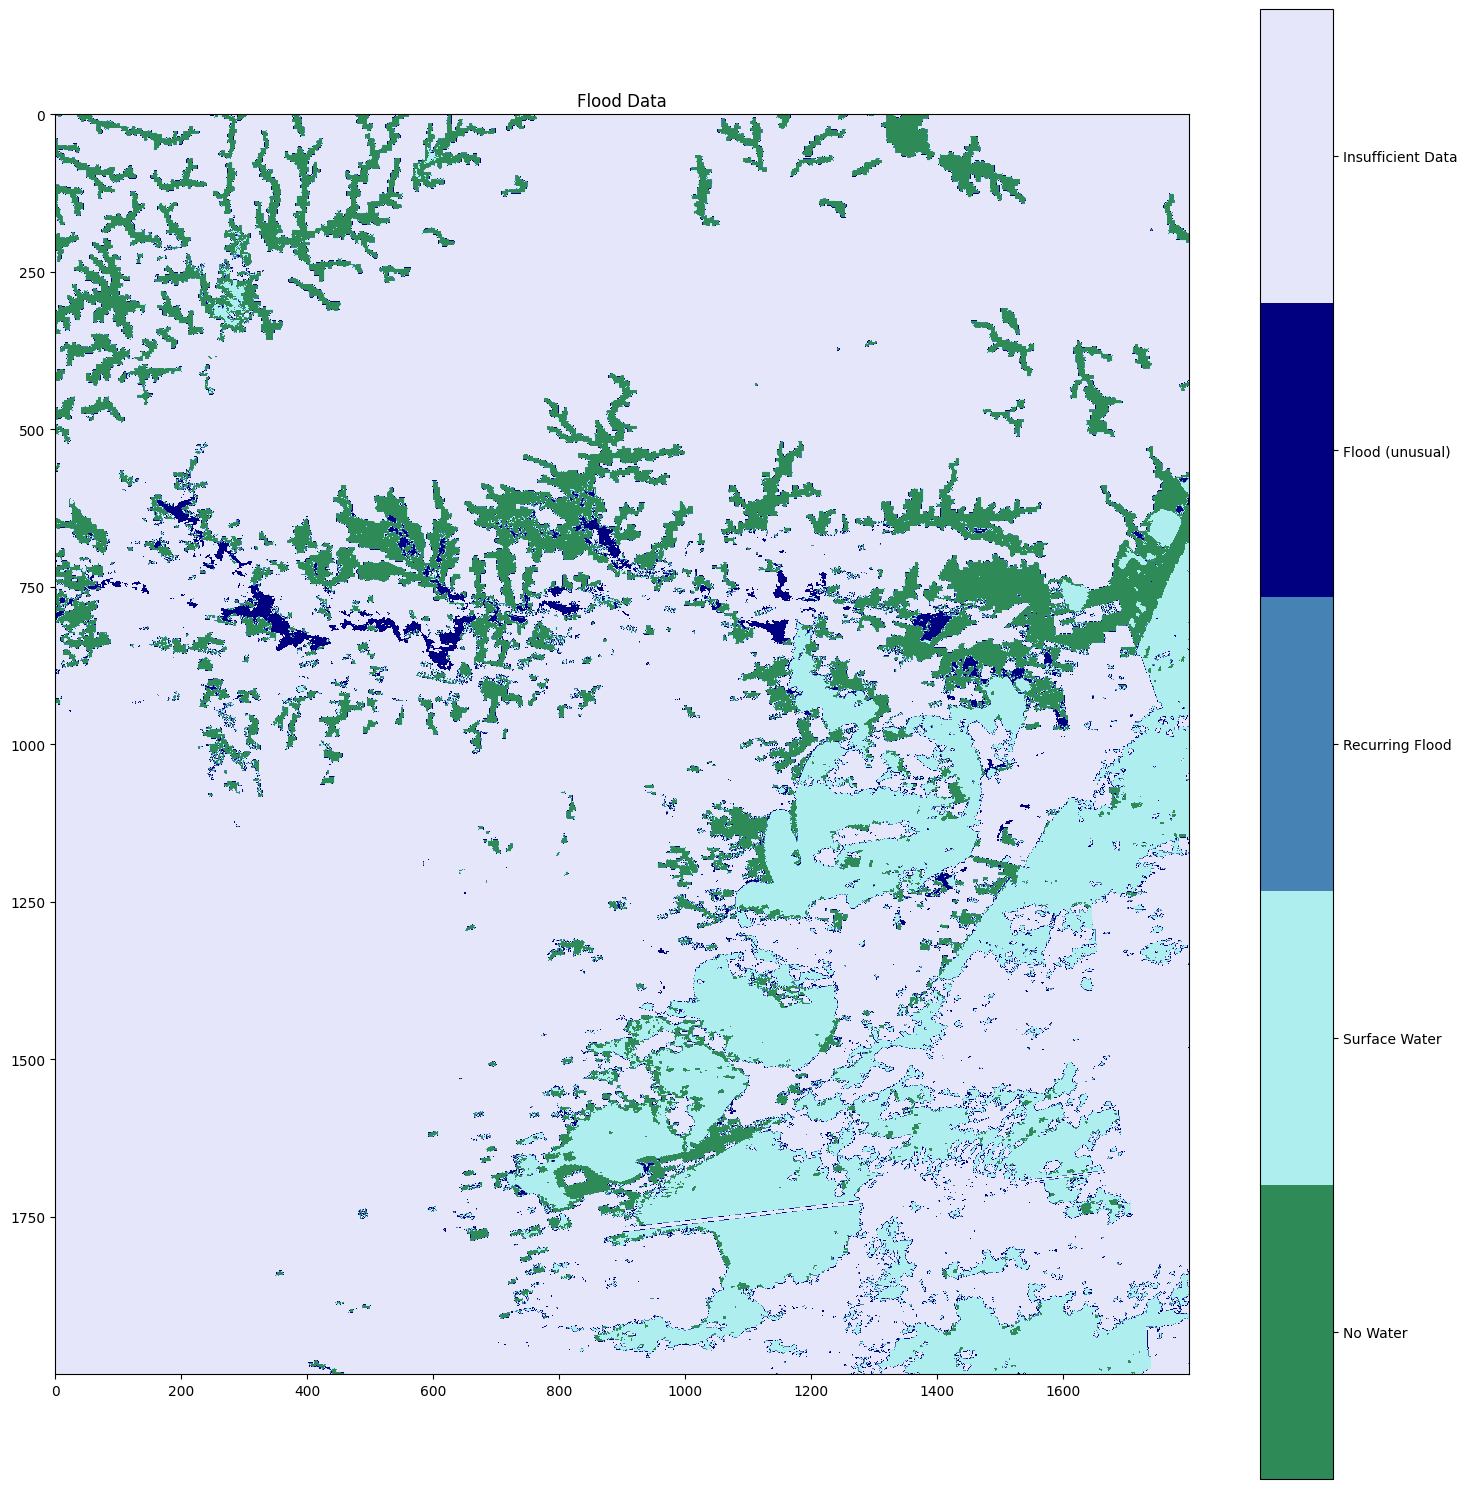

In [11]:
colors = ['seagreen', 'paleturquoise', 'steelblue', 'navy','lavender']
plot_data = new_data.copy()
plot_data[plot_data == 255] = 4 # Map 255 to 4 so it looks neat
cmap = ListedColormap(colors) # Create custom colormap

# Create the plot
plt.figure(figsize=(15, 15))
im = plt.imshow(plot_data[4000:6000, 3000:4800], cmap=cmap, vmin=0, vmax=4)

# Create custom colorbar
cbar = plt.colorbar(im, ticks=[0.4, 1.2, 2, 2.8, 3.6])
cbar.ax.set_yticklabels(['No Water', 'Surface Water', 'Recurring Flood', 'Flood (unusual)', 'Insufficient Data'])  # Replace 4 with 255

plt.title('Flood Data')

plt.tight_layout()
plt.show()

#### Dynamic map with flooded areas
In this step, we are plotting the data of interest into a dynamic map. However, the steps are not straightforward as the data we want to plot, a slice of `new_data`, lacks georeferencing information.

For plotting an array in folium, we need to define its bounds, which we do by defining the coordinates of the southwest and northeast edges. The image below will help us calculate these coordinates. 

```{figure} ../images/coordinates_flood_data.png
---
width: 300
name: coordinates_flood_data
---
``` 
To obtain the coordinates of any pixel inside a GeoTiff image we can use the method `.xy()` over the DatasetReader. See the documentation [here](https://rasterio.readthedocs.io/en/stable/quickstart.html#spatial-indexing). The image from above has on the x-axis (the vertical) 9600 pixels (4800 per image) and on the y axis (horizontal) 4800 pixels. The Southwest edge coordinates are [6000, 3000] if we consider the combination of both images. However, this point lies on the h12v12 image and we need to reference it to a pixel there, which can be achieved with the following [(6000-4800), 3000]. For the Northeast pixel, which lies on the h12v11 we can use its coordinates without any adjustment [4000, 4800].

In [53]:
import folium
import numpy as np
from folium.raster_layers import ImageOverlay

In [54]:
small = new_data[4000:6000, 3000:4800]

In [59]:
southwest = [h12v12.xy(6000-4800, 3000)[1], h12v12.xy(6000-4800, 3000)[0]]
northeast = [h12v11.xy(4000, 4800)[1], h12v11.xy(4000, 4800)[0]]

In [60]:
bounds = [southwest, northeast]

In [61]:
center = [-30.046143, -51.215294] # this can be also calculated with method .xy()


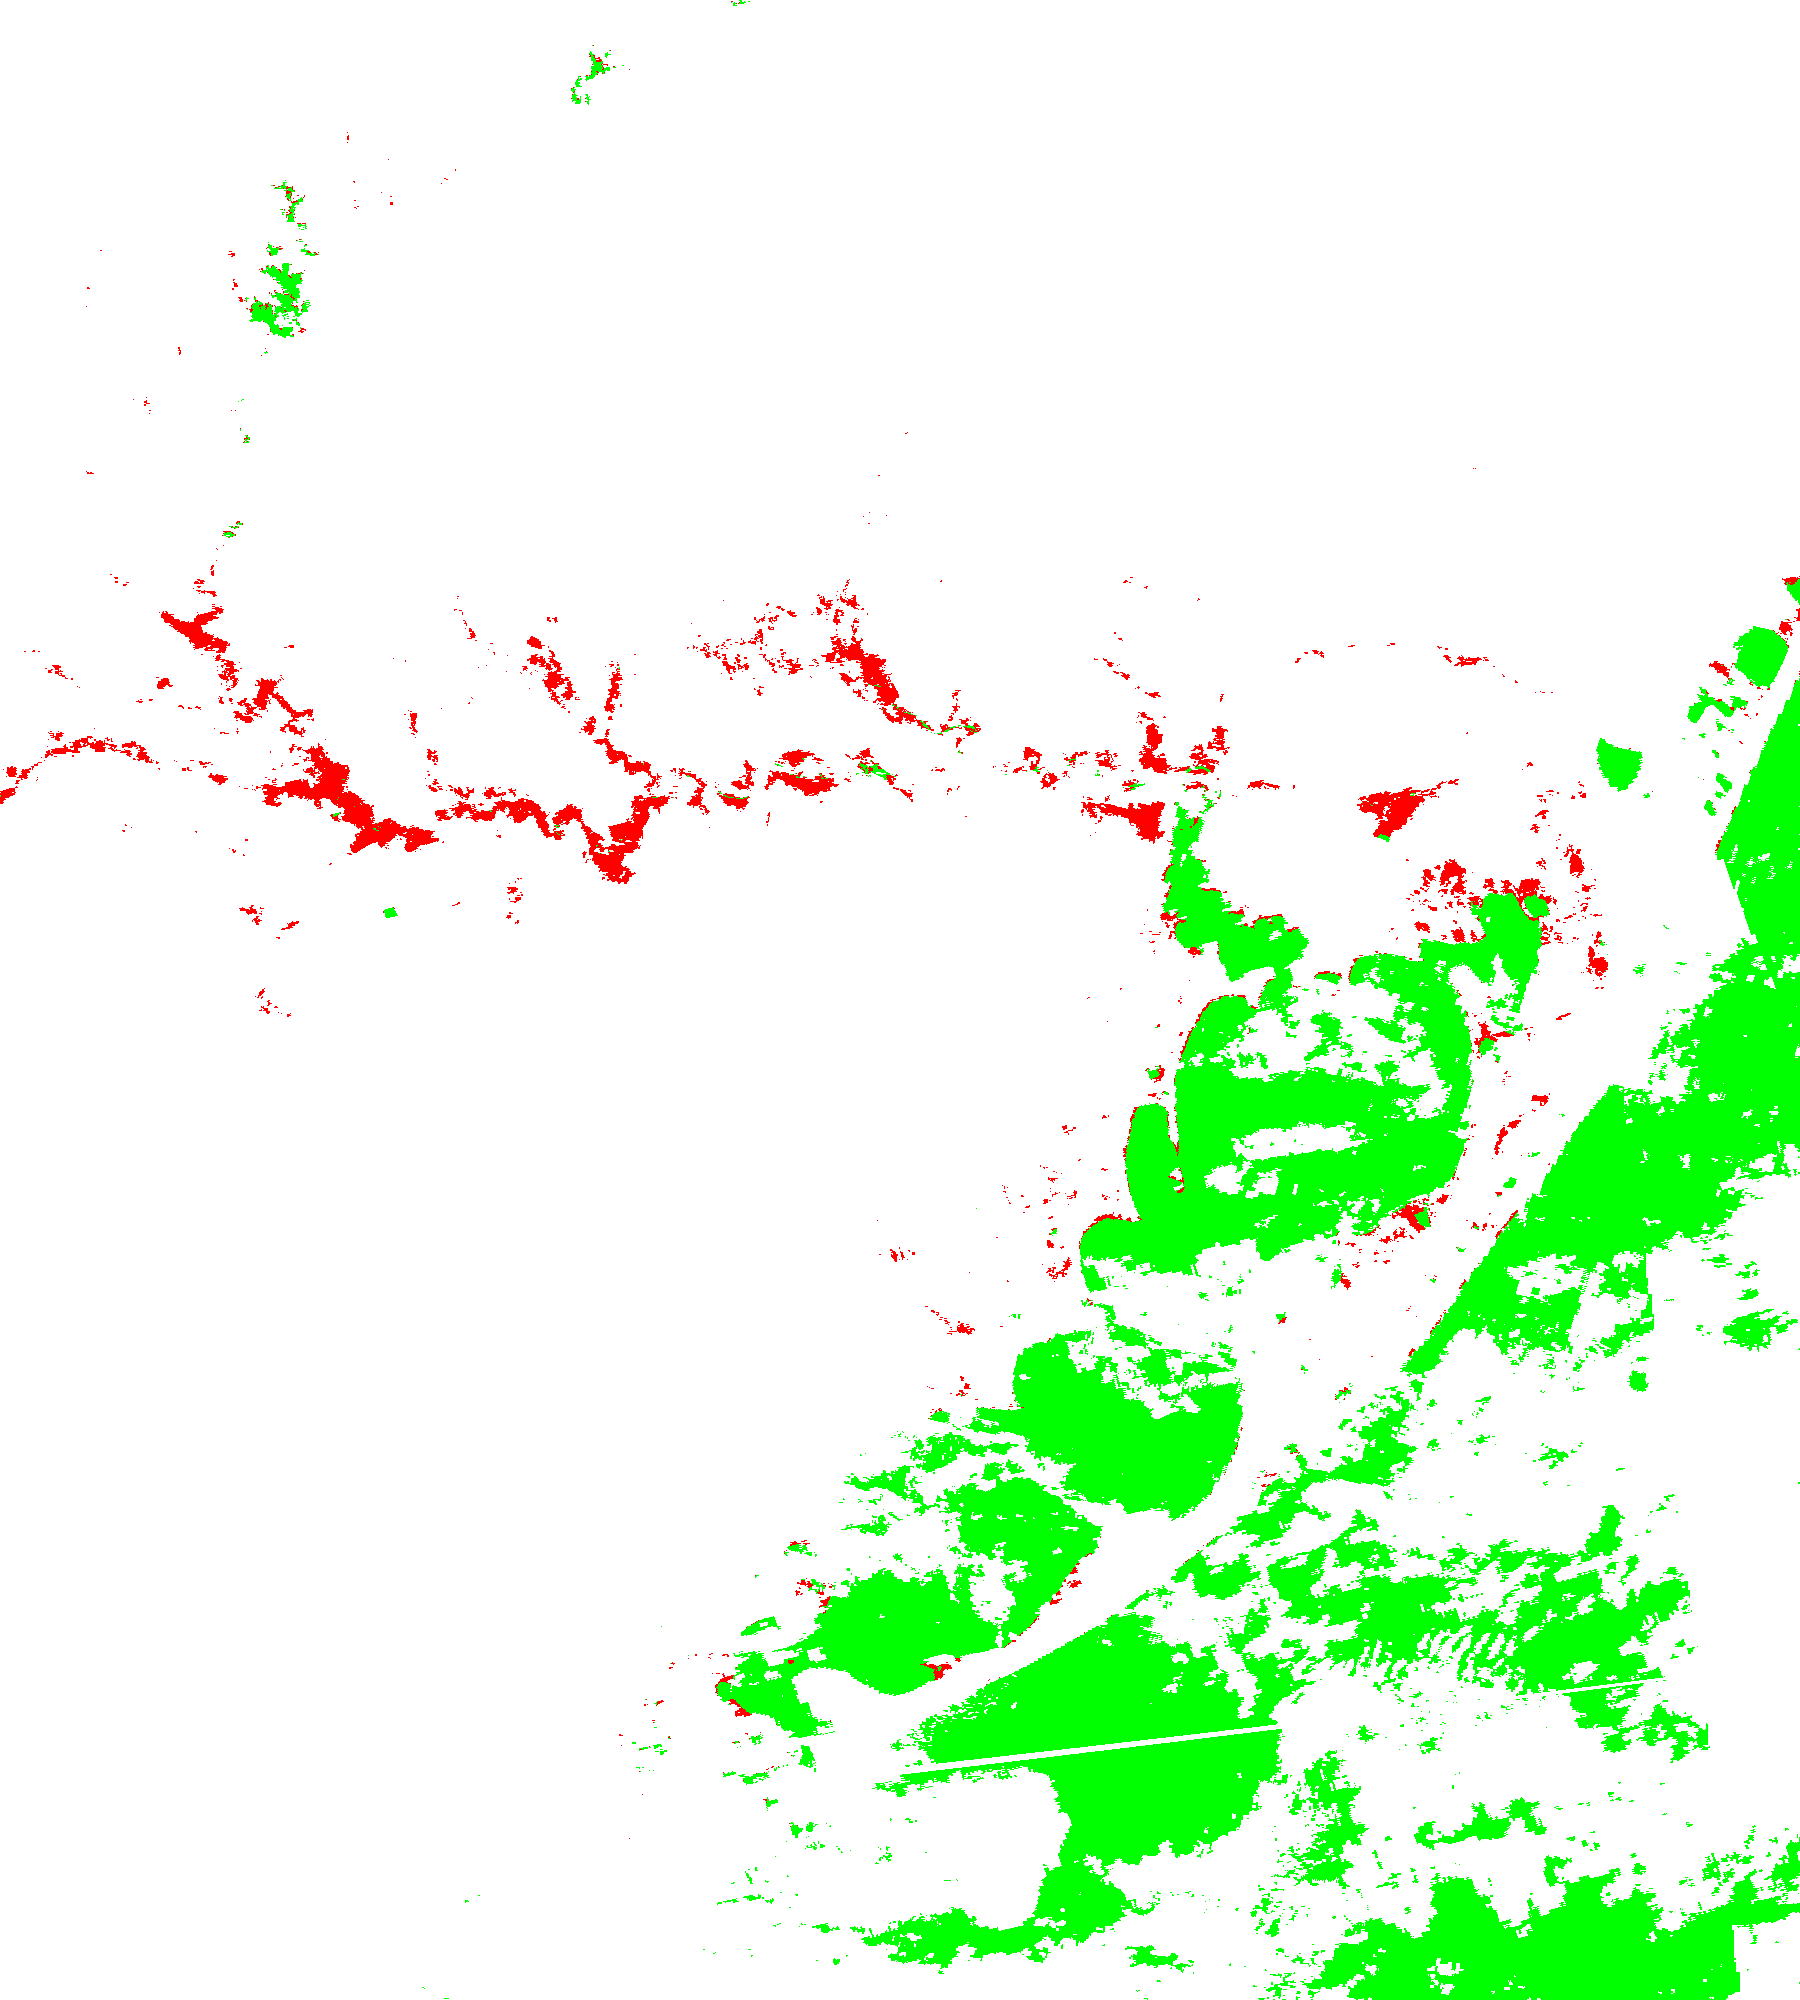

In [62]:
def colormap(value):
    color_dict = {
        1: (0, 255, 0, 255),      # Green for 1, Surface water
        2: (255, 255, 0, 255),    # Yellow for 2, Recurring flood
        3: (255, 0, 0, 255),    # Red for 3, Flood (unusual)
    }
    return color_dict.get(value, (0, 0, 0, 0))  # Default to transparent for other values

# Convert raster to an RGBA image using the colormap
rgba_raster = np.zeros((small.shape[0], small.shape[1], 4), dtype=np.uint8)
for value, color in [(1, colormap(1)), (2, colormap(2)), (3, colormap(3))]:
    mask = small == value
    rgba_raster[mask] = color


# Create a Folium map
m = folium.Map(location=center, zoom_start=10)

# Add the ndarray as an overlay
image = ImageOverlay(
    image=rgba_raster,
    bounds=bounds,
    opacity=0.7,
    interactive=True
)
image.add_to(m)
m

You can compare this map with the one created by the Emergency Response Coordination Centre for the 15 May.


```{figure} ../images/ercc_map_20240515.png
---
width: 800
name: tile_map_modis
---
Brazil | Severe weather, floods and EU response. [Source](https://erccportal.jrc.ec.europa.eu/ECHO-Products/Maps#/maps/4868).
``` 



#### Affected areas by Administrative level 2
Each pixel is 0.0020833 degrees, which is approximately 232 m at the equator. As we move away from the equator, the pixel area changes. Assuming that all pixels have more or less the same area in Rio Grande do Sul, we can add all the pixels at each administrative level 2 and find the boundaries that got more affected by the flood. 

In [19]:
admin2 = gpd.read_file('../../data/mapping-monitoring-floods/gadm41_BRA_2.json')

In [20]:
# Filter boundaries in Rio Grande do Sul
rgds = admin2[admin2['NAME_1']=='RioGrandedoSul'].copy()
rgds.reset_index(inplace = True, drop = True)

In [21]:
rgds = rgds.to_crs(h12v11.crs)

In [22]:
from rasterstats import zonal_stats # Import the rasterstats library

In [23]:
h12v11_stats = zonal_stats(rgds,
                '../../data/mapping-monitoring-floods/MCDWD_L3_F2_NRT.A2024127.h12v11.061.tif',
                categorical=True)
h12v12_stats = zonal_stats(rgds,
                '../../data/mapping-monitoring-floods/MCDWD_L3_F2_NRT.A2024127.h12v12.061.tif',
                categorical=True)

In [24]:
len(rgds), len(h12v11_stats), len(h12v12_stats)

(499, 499, 499)

In [25]:
for index, row in rgds.iterrows():
    h12v11_i = h12v11_stats[index]
    h12v12_i = h12v12_stats[index]
    for level in [0, 1, 2, 3, 255]:
        value = h12v11_i[level] if level in h12v11_i.keys() else 0 + h12v12_i[level] if level in h12v12_i.keys() else 0
        rgds.loc[index, f'level_{level}'] = value

In [26]:
rgds[['level_3', 'geometry']].explore(column = 'level_3')

### Save an array as a GeoTiff
In the following lines of code, we show you how to save an array into a GeoTiff file. As explained above, an array does not have georeferencing data associated to it. For that reason, Rasterio needs us to provide an Affine Transformation Matrix. This is a special matrix that when we multiply it with a pixel's coordinates, it will give us the pixel's latitude and longitude (or x and y if we are working with a projected coordinate reference system).

In [76]:
from rasterio.transform import from_origin

# Example: Define the spatial extent

xmin, ymin, xmax, ymax = southwest[1], southwest[0], northeast[1], northeast[0] 
xres = (xmax - xmin) / 1800
yres = (ymax - ymin) / 2000

# Create affine transformation
transform = from_origin(xmin, ymax, xres, yres)

In [ ]:
# Define saving parameters
new_dataset = rasterio.open(
    '/home/sol/Downloads/new_rgds.tif',
    'w',
    driver='GTiff',
    height=2000,
    width=1800,
    count=1,
    dtype=small.dtype,
    crs='+proj=latlong',
    transform=transform,
)
# Save
new_dataset.write(small, 1)
# Close
new_dataset.close()

### Discussion
* What other ways do you think it makes sense to show the impact of a flood?
* Which other datasets do you need? 

## Practice

Download the data for the flood that happened in TBD and recreate the above maps.
